# CO2 Emission Example with Multi-Layers Neural Network

This example can refer to [co2 example at ml5.js](https://github.com/ml5js/ml5-library/tree/main/examples/p5js/NeuralNetwork/NeuralNetwork_co2net). Only `population_cdp` and `latitude_degrees`,`longitude_degrees`, and `scope1_ghg_emissions_tons_co2e` are used to train the model, which is to estimate non-linear relationship between them. 

**Note: The dataset is quite small in this example which gives brife introduction of how to use multi-layer network. In practice, neural network needs much larger amount of data to train.**

In [1]:
from ml5_ipynb import ml5_nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [34]:
df = pd.read_csv('data/co2stats.csv')
df

,val,city_name,city_name_cdp,reporting_year_cdp,scope1_ghg_emissions_tons_co2e,year_of_emission,latitude_degrees,longitude_degrees,country,region,population_cdp,population_year_cdp
0,1,Abington,Abington Township,2016,193345.00,2010,40.100,-75.099722,USA,North America,55310,2010
1,2,Addis Ababa,Addis Ababa City Administration,2016,3708292.00,2012,9.030,38.740000,Ethiopia,Africa,3384569,2008
2,3,Adelaide,City of Adelaide,2016,63724.00,2013,-34.929,138.601000,Australia,Oceania,23169,2015
3,7,"Ajax, ON","Town of Ajax, ON",2016,6354.00,2008,43.858,-79.036389,Canada,North America,109600,2011
4,8,Albany,City of Albany,2017,663997.00,2010,42.653,-73.757222,USA,North America,97856,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
145,315,Winnipeg,City of Winnipeg,2016,5167453.00,1998,49.899,-97.139167,Canada,North America,718400,2015
146,327,Yilan,Yilan County,2016,6911264.55,2013,24.751,121.759167,Taiwan,East Asia,458777,2014
147,329,Yokohama,City of Yokohama,2016,12572000.00,2013,35.444,139.638056,Japan,East Asia,3719589,2015
148,330,Yonkers,City of Yonkers,2016,982940.00,2010,40.941,-73.864444,USA,North America,199766,2013


`scope1_ghg_emissions_tons_co2e` is the target variable.   
The default layers for regression task is as followed (refer to ml5.js):
```
layers: [
  {
    type: 'dense',
    units: this.options.hiddenUnits,
    activation: 'relu',
  },
  {
    type: 'dense',
    activation: 'sigmoid',
  },
];
```

We will add one more dense layer after the first dense layer. 
```
layers = [dict(
            type = 'dense',
            units = 64,
            activation='relu',
            ),
          dict(
            type = 'dense',
            units = 128,
            activation='relu',
          ),
          dict(
            type='dense',
            activation='sigmoid',
          )
    ]
```

In [37]:
data = df[['population_cdp','scope1_ghg_emissions_tons_co2e','latitude_degrees','longitude_degrees']].to_dict('list')
x = np.asarray([data['population_cdp'],data['latitude_degrees'],data['longitude_degrees']])
y = np.asarray(data['scope1_ghg_emissions_tons_co2e'])

In [64]:
options = dict(
  inputs=['population_cdp','latitude_degrees','longitude_degrees'],
  outputs=['scope1_ghg_emissions_tons_co2e'],
  task='regression',
  learningRate= 0.001,
  debug=True
)

nn = ml5_nn.neuralNetwork(options)

In [65]:
layers = [dict(
            type = 'dense',
            units = 64,
            activation='relu',
            ),
          dict(
            type = 'dense',
            units = 128,
            activation='relu',
          ),
          dict(
            type='dense',
            activation='sigmoid',
          )
    ]
nn.add_layer(layers)

In [66]:
nn.initialize_framework()

.Model is created


In [67]:
# add data
for i in range(len(x)):
    inp = {'population_cdp':x[0][i],'latitude_degrees':x[1][i],'longitude_degrees':x[2][i]}
    outp = {'scope1_ghg_emissions_tons_co2e':y[i]}
    nn.add_data(inp,outp)

In [68]:
nn.normalize_data()
trainingOptions = {'epochs': 500, 'batchSize' : 12}
nn.train_data(trainingOptions)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In the following, several data sampled from the training data will be tested. 

In [69]:
import random
random.seed(8)
test = random.sample(range(x.shape[1]),10)
for idx in test:
    i = x[0][idx]
    j = x[1][idx]
    k = x[2][idx]
    inp = {'population_cdp':i, 'latitude_degrees':j,'longitude_degrees':k}
    nn.predict_data(inp)

done
done
done
done
done
done
done
done
done
done


In [81]:
nn.predict_callback_list[:2]

[[{'scope1_ghg_emissions_tons_co2e': 1526106.384295702,
   'label': 'scope1_ghg_emissions_tons_co2e',
   'value': 1526106.384295702,
   'unNormalizedValue': 0.40124985575675964}],
 [{'scope1_ghg_emissions_tons_co2e': 253180.98616099358,
   'label': 'scope1_ghg_emissions_tons_co2e',
   'value': 253180.98616099358,
   'unNormalizedValue': 0.051983386278152466}]]

In [70]:
predict_y = [i[0]['value'] for i in nn.predict_callback_list]

In [71]:
predict_y

[1526106.384295702,
 253180.98616099358,
 474797.1452830434,
 1683313.4754884243,
 334884.1505545974,
 3608117.7426133156,
 385637.42479747534,
 3143713.6070075035,
 619366.9405584335,
 2637223.5838475227]

In [77]:
np.sqrt(np.mean((np.asarray(predict_y)-y[test])**2))

6987353.307977332

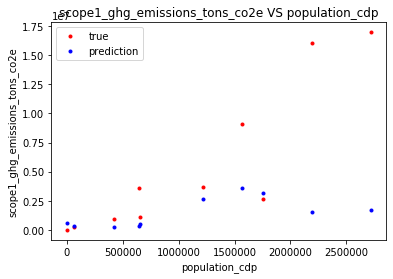

In [79]:
plt.plot(x[0][test],y[test],'.r', label='true')
plt.plot(x[0][test],predict_y,'.b', label='prediction')
plt.xlabel('population_cdp')
plt.ylabel('scope1_ghg_emissions_tons_co2e')
plt.title('scope1_ghg_emissions_tons_co2e VS population_cdp')
plt.legend()

The plot above indicates how the model perform on the test data using `population_cdp` as x axis. The MSE of prediction is around 6987353.

Since the data is quite small, the network is very easy to overfit on the data. Also, in strict setting, test data is recommended to use unseen data. 